In [8]:
import networkx as nx
import random as rd

alpha = 1 # threeshold for passing message
omega = 1 #thresgold for stance flip
class agent:
    def __init__(self, i, vulunerability = True, stance = 1):
        self.stance = stance # 1 is pro, -1 is anti
        self.vulunerable = vulunerability
        self.index = i
        self.associated_msg = [] #list of index for associated message 

    def stance_flip(self):
        self.stance = self.stance * (-1)

    def get_msg(self, new_msg):
        self.associated_msg.append(new_msg)

    def purge_msg(self):
        new_msg_list = []
        for msg in self.associated_msg:
            if msg.freshness > 0:
                new_msg_list.append(msg)
        #  new_msg_no_rep = list(set(new_msg_list))  
        # currently does not purge repeated msg because one can see multiple RT of same msg
        self.associated_msg = new_msg_list

    def calculate_msg(self):
        SE, SL, DE, DL = [0,0,0,0]
        if len(self.associated_msg) > 0:
            for message in self.associated_msg:
                if message.freshness > 0:
                    if message.stance == self.stance and message.manuver == 'E':
                        SE += 1
                    elif message.stance == self.stance and message.manuver == 'L':
                        SL += 1
                    elif message.stance != self.stance and message.manuver == 'E':
                        DE += 1
                    elif message.stance != self.stance and message.manuver == 'L':
                        DL += 1
        return(SE, SL, DE, DL)


In [9]:
class msg:
    def __init__(self,i, manuver, stance = 1):  # 1 is pro, -1 is anti
        self.index = i
        self.stance = stance
        self.manuver = manuver # E - emotional L - logical
        self.freshness = 3 # start from 3

    def msg_age(self):
        if self.freshness >0:
            self.freshness -= 1

In [10]:
def news_generate(network, agent_dict, msg_list, news_agent_index, message_index, manuver, stance):
    #generate new message
    # i is the index for 
    new_msg = msg(message_index,manuver, stance)

    # add msg to list to keep track of aging of msg
    msg_list.append(new_msg)

    #get neighbor
    neighbors = [n for n in network.neighbors(news_agent_index)] #list of index for neighbors
    for j in neighbors:
        agent = agent_dict.get(j)
        agent.get_msg(new_msg)

In [12]:
alpha = 0
omega = 1

def singe_agent_spread(network,agent_dict, agent, alpha = alpha, omega = omega):
    SE, SL, DE, DL = agent.calculate_msg()
    neighbors = [n for n in network.neighbors(agent.index)]
    threshold = 0 
    flip_thresold = 0 
    if agent.vulunerable == False:
        threshold = SE + SL - (DE + DL)
        flip_thresold = (DE + DL) - (SE + SL)
    else:
        threshold = 2*SE + SL - (0*DE + DL) 
        flip_thresold =  (0*DE + DL) - (2*SE + SL)
    
    print('agent',agent.index ,'threshold:', threshold, ', flip:', flip_thresold)
    if threshold > alpha and len(agent.associated_msg)>0:
        print('spread')
        for msg  in agent.associated_msg:
            #spread only new fresh msg that have the samce stance
            if msg.freshness > 0 and msg.stance == agent.stance:
                print('msg ' + str(msg.index) + ' frensh and spreading')
                for j in neighbors:
                    msg_receiver = agent_dict[j]
                    print(j, msg_receiver) 
                    if j > 1:
                    #type(agent_dict[j]) == type(agent): 
                        """ THIS IS WIRED PROBLEM """
                        print(' to agent ' + str(msg_receiver.index))
                        agent_dict[j].get_msg(msg)
                        

    if flip_thresold > omega:
        print('flip')
        agent.stance_flip()

def age_msg(msg_list):
    for msg in msg_list:
        msg.msg_age()

def purge_all_agent_msg(agent_dict):
    for i in agent_dict:
        if i > 1:
        #type(agent_dict[i]) == agent:
            agent_dict[i].purge_msg()
    

## Test scenario

In [ ]:
######## 1 - testing agent ###########
#initialize agent
agent_1 = agent(i=1, vulunerability = False, stance =  -1 )

#initialize msg
msg_1 = msg(1, 'E', stance = 1)
msg_2 = msg(2, 'L', stance = 1)

#agent get message
agent_1.get_msg(msg_2)

#message update (lose freshness)
msg_1.msg_update()

#examine msg freshness
msg_1.freshness

#purge old message (externalized memory)
agent_1.purge_msg()

#check associated msg
agent_1.associated_msg

[]
[]
[]


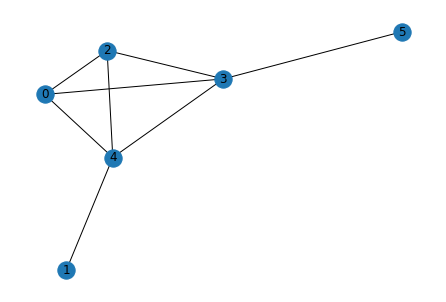

In [13]:
########## 2 - testing new generation function ##########

import networkx as nx
#create empty graph
#G = nx.Graph()

#initialize a randome graph
G = nx.erdos_renyi_graph(6, 0.4, seed=42, directed=False)
msg_list = []
#initialize agent
agent_dict = {}
agent_dict.update({0: 'news_0'})
agent_dict.update({1: 'news_1'})

#initialize agent
agent_2 = agent(i=2, vulunerability = False, stance =  -1 )
agent_3 = agent(i=3, vulunerability = False, stance =  -1 )
agent_4 = agent(i=4, vulunerability = True, stance =  1 )
agent_5 = agent(i=5, vulunerability = False, stance =  1 )

agent_dict.update({2:agent_2})
agent_dict.update({3:agent_3})
agent_dict.update({4:agent_4})
agent_dict.update({5:agent_5})

# generate msg
news_generate(G,agent_dict, msg_list, news_agent_index = 1, message_index = 1, manuver = 'E', stance = 1)

#print agent_dict to make sure all agent type correct
#agent_dict
#print graph for debugging
pos = nx.spring_layout(G)
nx.draw(G,with_labels = True)

#examnie associated msg
for i in range(2,6):
    print(agent_dict.get(i).associated_msg)

In [ ]:
##### 3 - test single agent_spread age_msg and purge_all_msg ########3


for i in agent_dict:
    if i>1:
        singe_agent_spread(G, agent_dict, agent_dict[i])

age_msg(msg_list)
purge_all_agent_msg(agent_dict)

for i in range(2,6):
    print((agent_dict.get(i).index, agent_dict.get(i).associated_msg))

#generate another msg
news_generate(G,agent_dict, msg_list, news_agent_index = 0, message_index = 2, manuver = 'E', stance = -1)


for i in agent_dict:
    if i>1:
        singe_agent_spread(G, agent_dict, agent_dict[i])

age_msg(msg_list)
purge_all_agent_msg(agent_dict)

for i in range(2,6):
    print((agent_dict.get(i).index, agent_dict.get(i).associated_msg))

In [ ]:
#news agent take the index of 1 and 2
### fix in later version for zero indexing issue, take 0 and 1
#### Appendix 1 - testing new usage of networkX of which to use agent directly as node ########
import networkx as nx
G = nx.Graph()
#initialize agent
agent_3 = agent(i=3, vulunerability = False, stance =  -1 )
agent_4 = agent(i=4, vulunerability = False, stance =  -1 )
agent_5 = agent(i=5, vulunerability = True, stance =  1 )
agent_6 = agent(i=6, vulunerability = False, stance =  1 )

#agent_list = [(agent_1.index, agent_1), (agent_2.index,agent_2), (agent_3.index,agent_3), (agent_4.index,agent_4)]
agent_list = [agent_5, agent_6, agent_3, agent_4]

G.add_nodes_from(agent_list)

G.nodes




In [ ]:
###### Appendix 2 debugging the singe_agent_spread function ##############
##### MAIN ISSUE is the 'type(agent_4) is agent' or 'type(agent)' problem, look like a systematic bug 
msg = agent_4.associated_msg[0]
msg = agent_4.associated_msg[0]

for j in neighbors:
    print(agent_dict[j])
    if type(agent_dict[j]) is agent:
        print((agent_dict[j].index, agent_dict[j].stance))
        agent_dict[j].get_msg(msg)

for msg  in agent_4.associated_msg:
    print(msg)

update(G, agent_dict, agent_4)

for i in range(2,6):
    print((agent_dict.get(i).index, agent_dict.get(i).associated_msg))

### Not yet tested

In [ ]:


def play(network, directory, mvy = 0, mry = 0):  #default: no mood noise, no mood regression
    #play game
    ##shuffule
    node_num = network.number_of_nodes()
    index = list(range(node_num))
    rd.shuffle(index)
    
    for i in index:
        #didn't shuffle neighbors but figured won't need to shuffle twice??
        neighbors = [n for n in network.neighbors(i)]
        player = directory.get(i) #return player agent
        for j in neighbors:
            player.game(directory.get(j)) #play a interaction game and update accordingly
         
    # each network only update their mood with noise and regression ONCE after everyone done playing
    if(mry == 1):
        for i in index:
            player = directory.get(i) 
            player.mood_regression()
            
    if(mvy == 1):
        for i in index:
            player = directory.get(i) 
            player.mood_vary() 

            
    #record the mood
    mood_value = []
    for i in list(directory.values()):
        mood_value.append(i.mood)
         
    return  mood_value

def run_sim(network, di, iters=100, mvy = 0, mry = 0):
    #make a storage list 
    mood_overtime = []
    for k in range(iters):
        mood_value = play(network, di, mvy, mry)
        mood_overtime.append(mean(mood_value))
        
    return mood_overtime   